# Find block J

In [1]:
from pathlib import Path 
from Bio import SeqIO
from utils.blast_utils import blastn_dotplot, blastn_subject, default_blast_columns
import pandas as pd

# Input paths
blocks_nam = Path('/home/jpereira/OEs/Blocks_Namasivayam.fa')
step1 = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/seed_extension/all_97_97_s70/blocks.fasta')
step2 = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/0/retrieve/regions.fasta')
step2_1 = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/1/regions.fasta')
step2_2 = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/1/sorted.fasta')
step2_3 = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/1/centroids.fasta')

step3 = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/1/retrieve/regions.fasta')

# Output directory
output_dir = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j')
output_dir.mkdir(parents=True, exist_ok=True)

# Write only the record with ID 'Tg_mtDNA_J' to a FASTA file
block_j_fasta = output_dir / 'block_j.fasta'
for record in SeqIO.parse(blocks_nam, 'fasta'):
    if record.id == 'Tg_mtDNA_J':
        with open(block_j_fasta, 'w') as out:
            out.write(f">{record.id}\n{record.seq}\n")


In [ ]:


# Function to run blast and filter results
def check_id(id_name, query_fasta, subject_fasta, on: str = 'qseqid', work_dir="~"):
    work_dir = Path(work_dir).expanduser()
    temp_blast_tsv = work_dir / "temp.check_id"

    # Convert to string paths for subprocess
    query_fasta = str(query_fasta)
    subject_fasta = str(subject_fasta)
    temp_blast_tsv = str(temp_blast_tsv)

    # Run blastn against subject
    blastn_subject(
        blast_input_seqs=query_fasta,
        blast_subject_seqs=subject_fasta,
        blast_output_table_tsv=temp_blast_tsv,
        word_size=15
    )

    # Try reading the BLAST output
    try:
        blast_df = pd.read_csv(temp_blast_tsv, sep='\t', header=None)
    except pd.errors.EmptyDataError:
        print(f"⚠️ BLAST output is empty: {temp_blast_tsv}")
        return pd.DataFrame()  # Or return None if you prefer
    
    blast_df.columns = default_blast_columns
    
    # Optional filtering
    if on == 'query':
        length_filter = blast_df['length'] >= 20
        coverage_filter = blast_df['length'] / blast_df['qlen'] > 0.85
        pid_filter = blast_df['pident'] > 85  
        query_filter = blast_df['qseqid'] == id_name

        blast_df = blast_df[length_filter & coverage_filter & pid_filter & query_filter]

    return blast_df

# Run check
result_df = check_id('Tg_mtDNA_J', block_j_fasta, step1)
result_df = check_id('Tg_mtDNA_J', block_j_fasta, step2)
result_df = check_id('Tg_mtDNA_J', block_j_fasta, step2_1)

display(result_df.head())

result_df = check_id('Tg_mtDNA_J', block_j_fasta, step2_2)

display(result_df.head())

result_df = check_id('Tg_mtDNA_J', block_j_fasta, step2_3)

display(result_df.head())

## Empty DataFrame
result_df = check_id('Tg_mtDNA_J', block_j_fasta, step3)
display(result_df.head())


Running: blastn -query /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j/block_j.fasta -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/seed_extension/all_97_97_s70/blocks.fasta -out /home/jpereira/temp.check_id -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
blastn_subject ran successfully.
Running: blastn -query /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j/block_j.fasta -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/0/retrieve/regions.fasta -out /home/jpereira/temp.check_id -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
blastn_subject ran successfully.
Running: blastn -query /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j/block_j.fasta -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Da

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen
0,Tg_mtDNA_J,block_25:886-970,100.0,84,0,0,1,84,84,1,1.200000e-43,162,85,84
1,Tg_mtDNA_J,block_19:881-965,100.0,84,0,0,1,84,84,1,1.200000e-43,162,85,84
2,Tg_mtDNA_J,block_18:1-88,100.0,84,0,0,1,84,84,1,1.200000e-43,162,85,87
3,Tg_mtDNA_J,block_11:145-229,100.0,84,0,0,1,84,84,1,1.200000e-43,162,85,84
4,Tg_mtDNA_J,block_1:1-85,100.0,84,0,0,1,84,84,1,1.200000e-43,162,85,84


Running: blastn -query /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j/block_j.fasta -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/1/sorted.fasta -out /home/jpereira/temp.check_id -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
blastn_subject ran successfully.


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen
0,Tg_mtDNA_J,Seq20;size=1,100.0,84,0,0,1,84,84,1,8.100000e-44,162,85,87
1,Tg_mtDNA_J,Seq5;size=4,100.0,84,0,0,1,84,84,1,8.100000e-44,162,85,84
2,Tg_mtDNA_J,Seq37;size=1,100.0,82,0,0,4,85,1,82,1.160000e-42,158,85,86
3,Tg_mtDNA_J,Seq7;size=3,100.0,82,0,0,4,85,1,82,1.160000e-42,158,85,88
4,Tg_mtDNA_J,Seq1;size=4,100.0,82,0,0,4,85,1,82,1.160000e-42,158,85,82


Running: blastn -query /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j/block_j.fasta -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/1/centroids.fasta -out /home/jpereira/temp.check_id -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
blastn_subject ran successfully.


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen
0,Tg_mtDNA_J,Seq1;size=4,100.0,82,0,0,4,85,1,82,8.870000e-43,158,85,82


Running: blastn -query /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j/block_j.fasta -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/all_97_97_s70/block_iterations/1/retrieve/regions.fasta -out /home/jpereira/temp.check_id -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
blastn_subject ran successfully.
⚠️ BLAST output is empty: /home/jpereira/temp.check_id


""


# Find Blocks Mp/B

Seq6;size=3:1-144
Running: blastn -query /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_blocks/block_MpB.fasta -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/mcl_clustering/sequneces_clusters/cluster_1.fasta -out /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_blocks/blastn.block_MpB.tsv -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
blastn_subject ran successfully.


Text(0.5, 1.0, 'Aligment length of joinded blocks (Mp-B) on input reads')

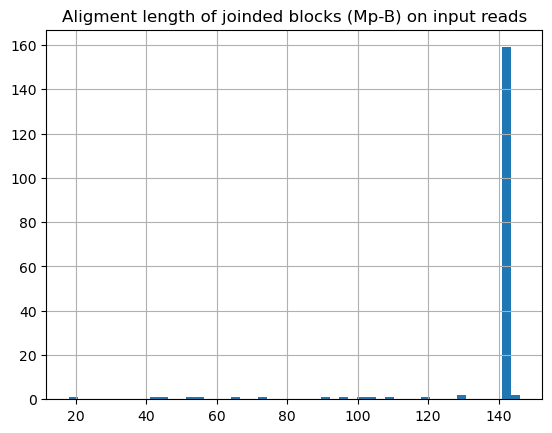

In [15]:
from Bio import SeqIO
import matplotlib.pyplot as plt

# Blocks Mp and B are inside seq6:size=3:1-144
blocks_kmer30_fasta = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/kmer30/block_iterations/1/retrieve/regions.fasta')
input_cluster_fasta = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/mcl_clustering/sequneces_clusters/cluster_1.fasta')


for record in SeqIO.parse(blocks_kmer30_fasta, 'fasta'):
    #print(record.id)
    if record.id == 'Seq6;size=3:1-144':
        print(record.id)
        
# Output directory
output_dir = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_blocks/')
output_dir.mkdir(parents=True, exist_ok=True)

# Write only the record with ID 'Tg_mtDNA_J' to a FASTA file
block_MpB_fasta = output_dir / 'block_MpB.fasta'
for record in SeqIO.parse(blocks_kmer30_fasta, 'fasta'):
    if record.id == 'Seq6;size=3:1-144':
        with open(block_MpB_fasta, 'w') as out:
            out.write(f">{record.id}\n{record.seq}\n")

output_step_blmb_tsv= output_dir / 'blastn.block_MpB.tsv'
blastn_subject(blast_input_seqs=block_MpB_fasta, blast_subject_seqs=input_cluster_fasta, blast_output_table_tsv=output_step_blmb_tsv,word_size=15)
blast_df = pd.read_csv(output_step_blmb_tsv, sep='\t', header=None)
blast_df.columns = default_blast_columns
blast_df['length'].hist(bins=50)
plt.title('Aligment length of joinded blocks (Mp-B) on input reads')


Seq13;size=2:1-110
Running: blastn -query /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_blocks/block_HpO.fasta -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/mcl_clustering/sequneces_clusters/cluster_1.fasta -out /home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_blocks/blastn.block_HpO.tsv -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
blastn_subject ran successfully.


Text(0.5, 1.0, 'Aligment length of joinded blocks (Hp-O) on input reads')

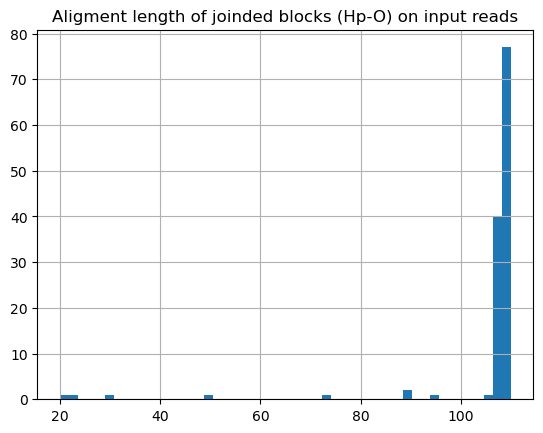

In [16]:
for record in SeqIO.parse(blocks_kmer30_fasta, 'fasta'):
    #print(record.id)
    if record.id == 'Seq13;size=2:1-110':
        print(record.id)
        
# Output directory
output_dir = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_blocks/')
output_dir.mkdir(parents=True, exist_ok=True)

# Write only the record with ID 'Tg_mtDNA_J' to a FASTA file
block_MpB_fasta = output_dir / 'block_HpO.fasta'
for record in SeqIO.parse(blocks_kmer30_fasta, 'fasta'):
    if record.id == 'Seq13;size=2:1-110':
        with open(block_MpB_fasta, 'w') as out:
            out.write(f">{record.id}\n{record.seq}\n")

output_step_blmb_tsv= output_dir / 'blastn.block_HpO.tsv'
blastn_subject(blast_input_seqs=block_MpB_fasta, blast_subject_seqs=input_cluster_fasta, blast_output_table_tsv=output_step_blmb_tsv,word_size=15)
blast_df = pd.read_csv(output_step_blmb_tsv, sep='\t', header=None)
blast_df.columns = default_blast_columns
blast_df['length'].hist(bins=50)
plt.title('Aligment length of joinded blocks (Hp-O) on input reads')

In [ ]:
from Bio import SeqIO

# Blocks Mp and B are inside seq6:size=3:1-144
blocks_kmer30_fasta = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/define_blocks/kmer30/block_iterations/1/retrieve/regions.fasta')
input_cluster_fasta = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/mcl_clustering/sequneces_clusters/cluster_1.fasta')


for record in SeqIO.parse(blocks_kmer30_fasta, 'fasta'):
    #print(record.id)
    if record.id == 'Seq6;size=3:1-144':
        print(record.id)
        
# Output directory
output_dir = Path('/home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_blocks/')
output_dir.mkdir(parents=True, exist_ok=True)

# Write only the record with ID 'Tg_mtDNA_J' to a FASTA file
block_MpB_fasta = output_dir / 'block_MpB.fasta'
for record in SeqIO.parse(blocks_kmer30_fasta, 'fasta'):
    if record.id == 'Seq6;size=3:1-144':
        with open(block_MpB_fasta, 'w') as out:
            out.write(f">{record.id}\n{record.seq}\n")

output_step_blmb_tsv= output_dir / 'blastn.block_MpB.tsv'
blastn_subject(blast_input_seqs=block_MpB_fasta, blast_subject_seqs=input_cluster_fasta, blast_output_table_tsv=output_step_blmb_tsv)
blast_df = pd.read_csv(output_step_blmb_tsv, sep='\t', header=None)
blast_df.columns = default_blast_columns
blast_df['length'].hist()

In [12]:
def check_id(id_name, query_fasta, subject_fasta, on: str = 'qseqid', work_dir="~"):
    
    temp_blast_tsv = Path(work_dir) / "temp.check_id"
    
    query_fasta = str(query_fasta)
    subject_fasta = str(subject_fasta) 
    temp_blast_tsv= str(temp_blast_tsv)
    
    
    blastn_subject(blast_input_seqs=query_fasta, blast_subject_seqs=subject_fasta, blast_output_table_tsv=temp_blast_tsv, word_size=15)
    blast_df = pd.read_csv(temp_blast_tsv,sep='\t')
    blast_df.columns = default_blast_columns
    
    if on == 'query':
        
        length_filter = blast_df['length'] >= 20
        coverage_filter = blast_df['qlen'] / blast_df['length'] > 0.85
        pid_filter = blast_df['pident']  > 0.85
        query_filter = blast_df['qseqid'] == id_name 
        
        blast_df = blast_df[length_filter & coverage_filter & pid_filter & query_filter]
    
    return(blast_df)
        

Running: blastn -query <_io.TextIOWrapper name='/home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j/block_j.fata' mode='w' encoding='UTF-8'> -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/seed_extension/all_97_97_s70/blocks.fasta -out ~/temp.check_id -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
Error in running blastn_subject: Command 'blastn -query <_io.TextIOWrapper name='/home/jpereira/OEs/Results/OE1/NamSeqs/Data/find_j/block_j.fata' mode='w' encoding='UTF-8'> -subject /home/jpereira/OEs/Results/OE1/NamSeqs/Data/seed_extension/all_97_97_s70/blocks.fasta -out ~/temp.check_id -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 15 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'' returned non-zero exit status 2.


/bin/sh: 1: cannot open _io.TextIOWrapper: No such file


FileNotFoundError: [Errno 2] No such file or directory: '/home/jpereira/temp.check_id'

In [8]:
default_blast_columns

['qseqid',
 'sseqid',
 'pident',
 'length',
 'mismatch',
 'gapopen',
 'qstart',
 'qend',
 'sstart',
 'send',
 'evalue',
 'bitscore',
 'qlen',
 'slen']